In [13]:
pip install pandas numpy matplotlib seaborn

In [14]:
import pandas as pd

In [15]:
df= pd.read_csv("company_esg_financial_dataset.csv")
df

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
# Replace 'company_esg_financial_dataset.csv' with the actual path to your file
try:
    df = pd.read_csv('company_esg_financial_dataset.csv')
    print("Dataset loaded successfully.")

    # Identify rows with and without missing GrowthRate values
    df_train = df.dropna(subset=['GrowthRate']).copy()
    df_predict = df[df['GrowthRate'].isnull()].copy()

    # Define features (predictors) and the target variable
    features = ['Industry', 'Region', 'ESG_Overall', 'MarketCap']
    target = 'GrowthRate'

    # Preprocessing for categorical and numerical features using a ColumnTransformer
    categorical_features = ['Industry', 'Region']
    numerical_features = ['ESG_Overall', 'MarketCap']

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
            ('num', 'passthrough', numerical_features)
        ])

    # Create a machine learning pipeline
    # The pipeline first preprocesses the data and then trains the model
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    # Train the model on the data with existing GrowthRate values
    X_train = df_train[features]
    y_train = df_train[target]
    print("\nTraining the model on known data...")
    model.fit(X_train, y_train)
    print("Model training complete.")

    # Predict the missing GrowthRate values
    if not df_predict.empty:
        X_predict = df_predict[features]
        predicted_growth_rate = model.predict(X_predict)
        
        # Fill the missing values in the original DataFrame with the predictions
        df.loc[df['GrowthRate'].isnull(), 'GrowthRate'] = predicted_growth_rate
        
        print("\nMissing GrowthRate values have been predicted and filled.")
    else:
        print("\nNo missing GrowthRate values to predict.")

    # Verify that the imputation was successful
    print("\nNumber of null values in 'GrowthRate' after imputation:")
    print(df['GrowthRate'].isnull().sum())
    
    # Display the first few rows of the updated DataFrame
    print("\nFirst 5 rows of the updated DataFrame:")
    print(df.head())

except FileNotFoundError:
    print("Error: The file 'company_esg_financial_dataset.csv' was not found. Please ensure it is in the correct directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully.

Training the model on known data...
Model training complete.

Missing GrowthRate values have been predicted and filled.

Number of null values in 'GrowthRate' after imputation:
0

First 5 rows of the updated DataFrame:
   CompanyID CompanyName Industry         Region  Year  Revenue  ProfitMargin  \
0          1   Company_1   Retail  Latin America  2015    459.2           6.0   
1          1   Company_1   Retail  Latin America  2016    473.8           4.6   
2          1   Company_1   Retail  Latin America  2017    564.9           5.2   
3          1   Company_1   Retail  Latin America  2018    558.4           4.3   
4          1   Company_1   Retail  Latin America  2019    554.5           4.9   

   MarketCap  GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  \
0      337.5        1.59         57.0               60.7        33.5   
1      366.6        3.20         56.7               58.9        32.8   
2      313.4       19.20         56.5           

In [17]:
df

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,1.59,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.20,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.20,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.10,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.70,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.40,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.90,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.90,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.80,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3


In [19]:
try:
    df = pd.read_csv('company_esg_financial_dataset_imputed.csv')

    # Check for null values in all columns
    null_counts = df.isnull().sum()

    print("Number of null values in each column:")
    print(null_counts)

    # To get the total number of nulls in the entire DataFrame
    total_nulls = df.isnull().sum().sum()
    print(f"\nTotal number of null values in the entire DataFrame: {total_nulls}")

except FileNotFoundError:
    print("Error: The imputed file was not found. Please ensure it has been saved correctly.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Number of null values in each column:
CompanyID            0
CompanyName          0
Industry             0
Region               0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64

Total number of null values in the entire DataFrame: 0


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the imputed dataset
# Make sure this file is in the same directory as your script
try:
    df = pd.read_csv('company_esg_financial_dataset_imputed.csv')
    print("Dataset loaded successfully.")

    # Define the features (X) and the target variable (y)
    features = ['Revenue', 'ProfitMargin', 'MarketCap', 'Industry', 'Region']
    target = 'ESG_Overall'

    X = df[features]
    y = df[target]

    # Identify categorical and numerical features for preprocessing
    categorical_features = ['Industry', 'Region']
    numerical_features = ['Revenue', 'ProfitMargin', 'MarketCap']

    # Create a preprocessor to handle different data types
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # Create a pipeline with the preprocessor and the Random Forest model
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

    # Split the data for training and testing (optional, but good practice)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    print("\nTraining the Random Forest model...")
    model.fit(X_train, y_train)
    print("Model training complete.")

    # Get the feature importances from the trained model
    # The 'named_steps' allows access to components of the pipeline
    importances = model.named_steps['regressor'].feature_importances_

    # Get the feature names after one-hot encoding
    encoded_feature_names = model.named_steps['preprocessor'].get_feature_names_out(features)
    
    # Create a DataFrame to visualize feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': encoded_feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print("\nFeature Importance (Top 10):")
    print(feature_importance_df.head(10))

    # Optional: Plot the feature importance for a clear visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
    plt.title('Top 10 Most Important Features Impacting ESG_Overall Score')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: The file 'company_esg_financial_dataset_imputed.csv' was not found. Please ensure it is in the correct directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully.

Training the Random Forest model...
Model training complete.

Feature Importance (Top 10):
                         Feature  Importance
0                   num__Revenue    0.216127
1              num__ProfitMargin    0.160112
14            cat__Region_Europe    0.115300
2                 num__MarketCap    0.111906
17     cat__Region_North America    0.081660
18           cat__Region_Oceania    0.076279
5          cat__Industry_Finance    0.054183
9       cat__Industry_Technology    0.031748
10  cat__Industry_Transportation    0.023356
13              cat__Region_Asia    0.020135
An unexpected error occurred: name 'sns' is not defined


<Figure size 1000x600 with 0 Axes>

In [21]:
import statsmodels.api as sm

# Define the dependent variable (target) and independent variables (features)
Y = df['ProfitMargin']
X = df[['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']]

# Add a constant to the independent variable for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           ProfitMargin   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     144.6
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          1.11e-120
Time:                        05:57:30   Log-Likelihood:                -39196.
No. Observations:               11000   AIC:                         7.840e+04
Df Residuals:                   10995   BIC:                         7.844e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.9242      0.29

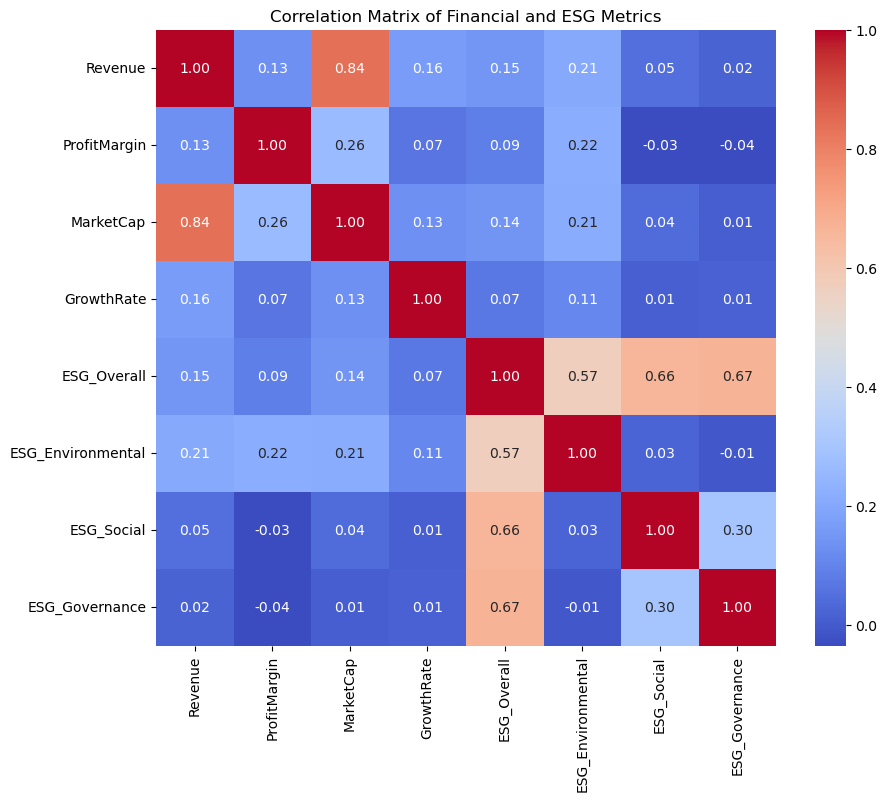

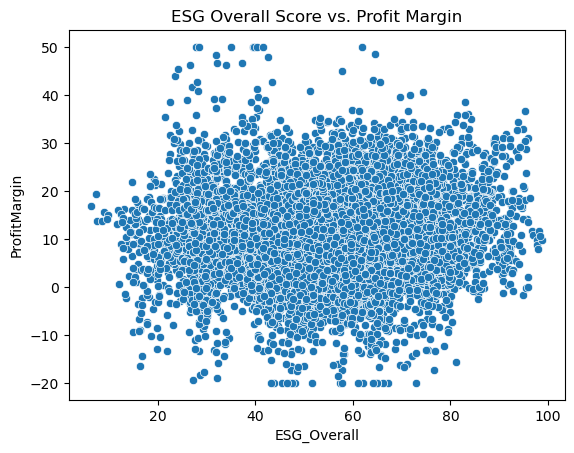

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of the correlation matrix
financial_cols = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate']
esg_cols = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']

corr_matrix = df[financial_cols + esg_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Financial and ESG Metrics')
plt.show()

# scatter plots to visualize relationships
sns.scatterplot(x='ESG_Overall', y='ProfitMargin', data=df)
plt.title('ESG Overall Score vs. Profit Margin')
plt.show()

Mean Squared Error (MSE): 393652427.69
R-squared (R2): 0.82


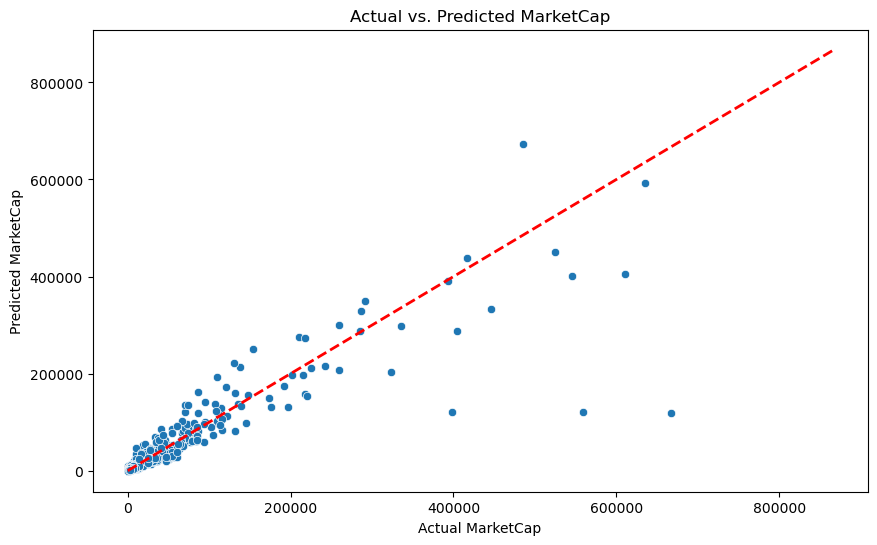


Feature Importances:
             Feature  Importance
4            Revenue    0.757729
5       ProfitMargin    0.161250
2         ESG_Social    0.022460
1  ESG_Environmental    0.022205
3     ESG_Governance    0.013085
6         GrowthRate    0.011999
0        ESG_Overall    0.011272


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the imputed dataset
df = pd.read_csv('company_esg_financial_dataset_imputed.csv')

# Define features (X) and the target variable (y)
# Features include ESG scores and other financial metrics
features = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
            'Revenue', 'ProfitMargin', 'GrowthRate']
target = 'MarketCap'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual MarketCap")
plt.ylabel("Predicted MarketCap")
plt.title("Actual vs. Predicted MarketCap")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Line for perfect predictions
plt.show()

# Get Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance)

C:\Users\ARPIT PATEL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


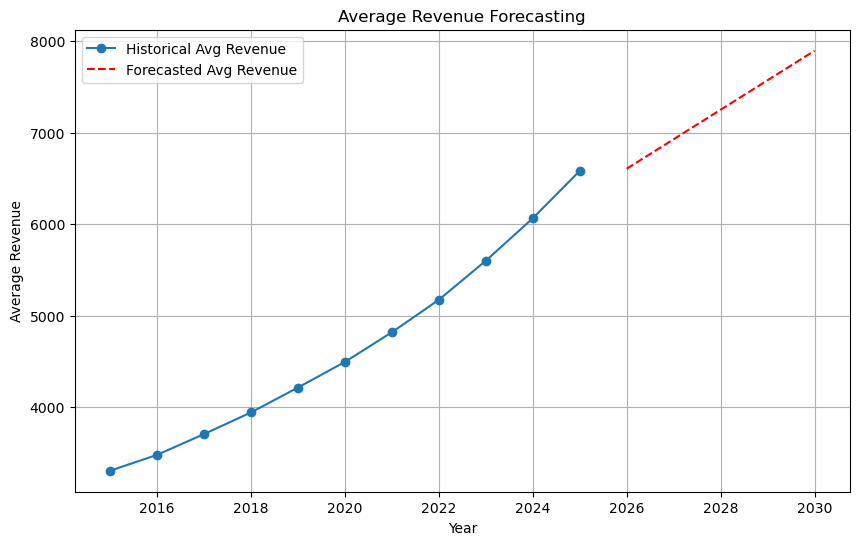


Forecasted Average Revenue for the next 5 years:
Year 2026: $6,605.56
Year 2027: $6,928.02
Year 2028: $7,250.47
Year 2029: $7,572.92
Year 2030: $7,895.37


In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the imputed dataset
df = pd.read_csv('company_esg_financial_dataset_imputed.csv')

# Aggregate the data by year to create a time series
time_series_data = df.groupby('Year').agg(
    Avg_Revenue=('Revenue', 'mean'),
    Avg_MarketCap=('MarketCap', 'mean'),
    Avg_ESG_Overall=('ESG_Overall', 'mean')
).reset_index()

# Prepare the data for forecasting
X = time_series_data[['Year']]
y = time_series_data['Avg_Revenue']

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Forecast for the next 5 years
future_years = np.arange(time_series_data['Year'].max() + 1, time_series_data['Year'].max() + 6).reshape(-1, 1)
forecasted_revenue = model.predict(future_years)

# Visualize the historical and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(time_series_data['Year'], time_series_data['Avg_Revenue'], 'o-', label='Historical Avg Revenue')
plt.plot(future_years, forecasted_revenue, 'r--', label='Forecasted Avg Revenue')
plt.title('Average Revenue Forecasting')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.legend()
plt.grid(True)
plt.show()

print("\nForecasted Average Revenue for the next 5 years:")
for year, revenue in zip(future_years.flatten(), forecasted_revenue):
    print(f"Year {int(year)}: ${revenue:,.2f}")

Dataset loaded successfully.

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:            Avg_Revenue   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     395.4
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           9.55e-09
Time:                        06:36:52   Log-Likelihood:                -71.012
No. Observations:                  11   AIC:                             146.0
Df Residuals:                       9   BIC:                             146.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

C:\Users\ARPIT PATEL\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


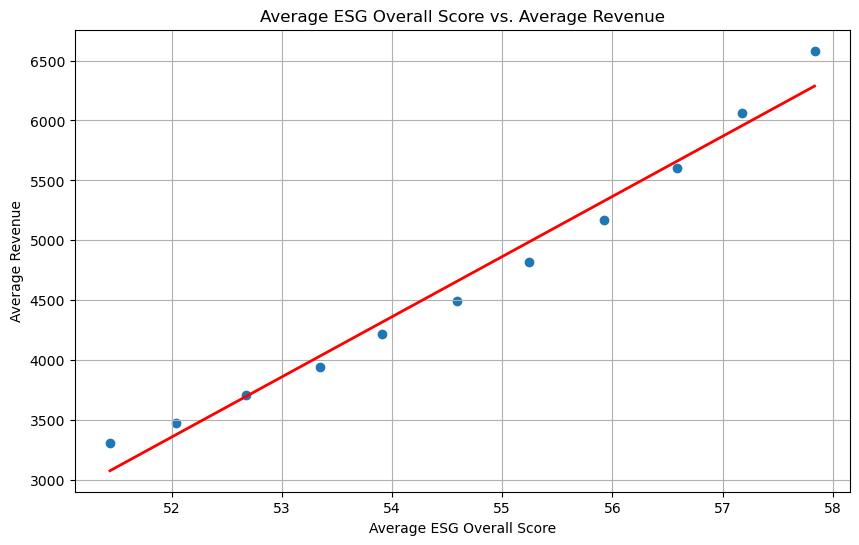

In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the imputed dataset
# Make sure this file is in the same directory as your script
try:
    df = pd.read_csv('company_esg_financial_dataset_imputed.csv')
    print("Dataset loaded successfully.")

    # Aggregate the data by year to create a time series
    time_series_data = df.groupby('Year').agg(
        Avg_Revenue=('Revenue', 'mean'),
        Avg_ESG_Overall=('ESG_Overall', 'mean')
    ).reset_index()

    # Define the dependent variable (target) and independent variable (feature)
    Y = time_series_data['Avg_Revenue']
    X = time_series_data['Avg_ESG_Overall']

    # Add a constant to the independent variable for the intercept
    X = sm.add_constant(X)

    # Fit the OLS regression model
    model = sm.OLS(Y, X).fit()

    # Print the summary of the regression results
    print("\nOLS Regression Results:")
    print(model.summary())

    # Optional: Visualize the relationship
    plt.figure(figsize=(10, 6))
    plt.scatter(time_series_data['Avg_ESG_Overall'], time_series_data['Avg_Revenue'])
    plt.plot(time_series_data['Avg_ESG_Overall'], model.fittedvalues, color='red', linewidth=2)
    plt.title('Average ESG Overall Score vs. Average Revenue')
    plt.xlabel('Average ESG Overall Score')
    plt.ylabel('Average Revenue')
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print("Error: The file 'company_esg_financial_dataset_imputed.csv' was not found. Please ensure it is in the correct directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")